In [16]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [17]:
covid_df = pd.read_csv('covid_data1.csv')
covid_df.head()

,Date,Daily Cases,Daily Deaths
0,22-01-2020,4974.0,90.0
1,23-01-2020,10023.0,174.0
2,24-01-2020,14942.0,282.0
3,25-01-2020,19962.0,387.0
4,26-01-2020,25039.0,505.0


In [30]:
# Download Data
stock_symbols = ['^GSPC', '^IXIC', '^DJI']
stock_data = yf.download(stock_symbols, start='2020-01-01', end='2021-12-31')
stock_data.head()

[*********************100%%**********************]  3 of 3 completed


Price          Adj Close                                   Close               \
Ticker              ^DJI        ^GSPC        ^IXIC          ^DJI        ^GSPC   
Date                                                                            
2020-01-02  28868.800781  3257.850098  9092.190430  28868.800781  3257.850098   
2020-01-03  28634.880859  3234.850098  9020.769531  28634.880859  3234.850098   
2020-01-06  28703.380859  3246.280029  9071.469727  28703.380859  3246.280029   
2020-01-07  28583.679688  3237.179932  9068.580078  28583.679688  3237.179932   
2020-01-08  28745.089844  3253.050049  9129.240234  28745.089844  3253.050049   

Price                            High                                     Low  \
Ticker            ^IXIC          ^DJI        ^GSPC        ^IXIC          ^DJI   
Date                                                                            
2020-01-02  9092.190430  28872.800781  3258.139893  9093.429688  28627.769531   
2020-01-03  9020.769531  28716.310547  3246.149902  9065.759766  28500.359375   
2020-01-06  9071.469727  28708.019531  3246.840088  9072.410156  28418.630859   
2020-01-07  9068.580078  28685.500000  3244.909912  9091.929688  28565.279297   
2020-01-08  9129.240234  28866.179688  3267.070068  9168.889648  28522.509766   

Price                                         Open                            \
Ticker            ^GSPC        ^IXIC          ^DJI        ^GSPC        ^IXIC   
Date                                                                           
2020-01-02  3235.530029  9010.889648  28638.970703  3244.669922  9039.459961   
2020-01-03  3222.340088  8976.429688  28553.330078  3226.360107  8976.429688   
2020-01-06  3214.639893  8943.500000  28465.500000  3217.550049  8943.500000   
2020-01-07  3232.429932  9042.549805  28639.179688  3241.860107  9076.639648   
2020-01-08  3236.669922  9059.379883  28556.140625  3238.590088  9068.030273   

Price          Volume                          
Ticker           ^DJI       ^GSPC       ^IXIC  
Date                                           
2020-01-02  251820000  3459930000  2862700000  
2020-01-03  239590000  3484700000  2586520000  
2020-01-06  252760000  3702460000  2810450000  
2020-01-07  258900000  3435910000  2381740000  
2020-01-08  291750000  3726840000  2472620000

# Data Processing

In [31]:
# clean Covid-19 Data
covid_df['Date'] = pd.to_datetime(covid_df['Date'])
covid_df.set_index('Date', inplace=True)

In [23]:
covid_df = covid_df.groupby('Date')['Daily Cases'].sum().reset_index()

In [32]:
# clean Stock Market Data
stock_data.shape
stock_data.isnull().sum()

Price      Ticker
Adj Close  ^DJI      0
           ^GSPC     0
           ^IXIC     0
Close      ^DJI      0
           ^GSPC     0
           ^IXIC     0
High       ^DJI      0
           ^GSPC     0
           ^IXIC     0
Low        ^DJI      0
           ^GSPC     0
           ^IXIC     0
Open       ^DJI      0
           ^GSPC     0
           ^IXIC     0
Volume     ^DJI      0
           ^GSPC     0
           ^IXIC     0
dtype: int64

In [33]:
stock_data = stock_data['Adj Close']
stock_data.columns = ['S&P 500', 'NASDAQ', 'Dow Jones']

In [26]:
covid_df.columns

Index(['Date', 'Daily Cases'], dtype='object')

In [34]:
# Merge Datasets
merged_data = pd.merge(covid_df,stock_data,left_index=True,right_index=True,how='inner')
merged_data.head()

,Daily Cases,S&P 500,NASDAQ,Dow Jones
Date,,,,
2020-01-22,4974.0,29186.269531,3321.750000,9383.769531
2020-01-23,10023.0,29160.089844,3325.540039,9402.480469
2020-01-24,14942.0,28989.730469,3295.469971,9314.910156
2020-01-27,29966.0,28535.800781,3243.629883,9139.309570
2020-01-28,34925.0,28722.849609,3276.239990,9269.679688


# Exploratory Data Analysis (EDA)

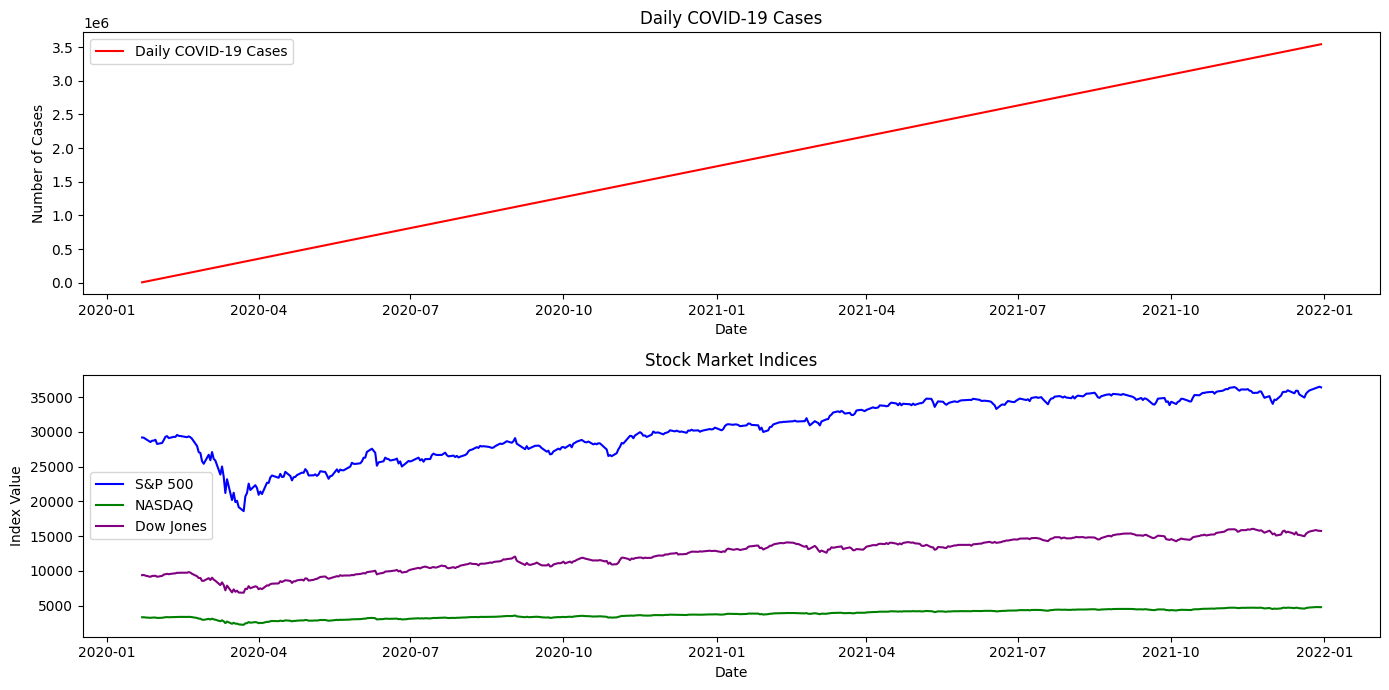

In [35]:
# Plot COVID-19 cases and stock market indices
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(merged_data.index, merged_data['Daily Cases'], label='Daily COVID-19 Cases', color='red')
plt.title('Daily COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_data.index, merged_data['S&P 500'], label='S&P 500', color='blue')
plt.plot(merged_data.index, merged_data['NASDAQ'], label='NASDAQ', color='green')
plt.plot(merged_data.index, merged_data['Dow Jones'], label='Dow Jones', color='purple')
plt.title('Stock Market Indices')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()

plt.tight_layout()
plt.show()

# Correlation Analysis

In [36]:
# Compute correlation
correlation_matrix = merged_data.corr()
print(correlation_matrix)

             Daily Cases   S&P 500    NASDAQ  Dow Jones
Daily Cases     1.000000  0.919950  0.960525   0.965809
S&P 500         0.919950  1.000000  0.988295   0.961078
NASDAQ          0.960525  0.988295  1.000000   0.982636
Dow Jones       0.965809  0.961078  0.982636   1.000000


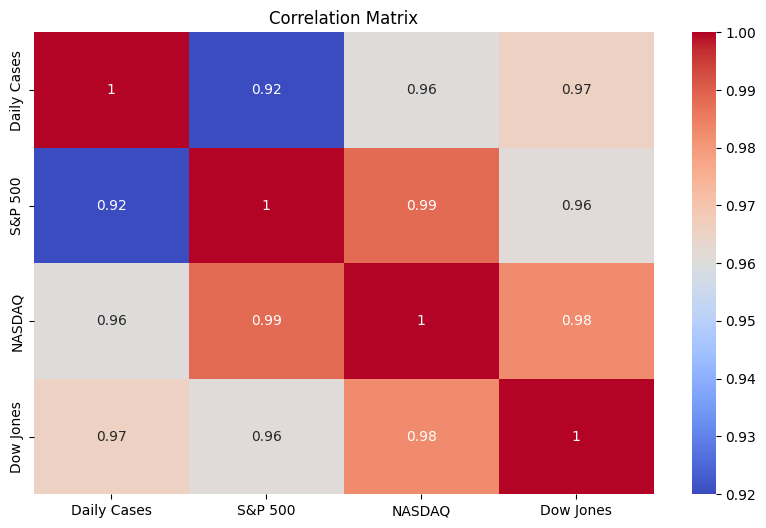

In [37]:
# Plot Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()